# <center> Jeodyshan Obra </center>

# <center> IS 362 Final Project </center>

## For this Project we will be using data from NYC Open Data on Motor Vehcile Collisions
### https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95
### WIth this data we will compare what was the average motor collisions last year compared to the Months when New York State was on PAUSE due to COVID-19

### First we need to install sodapy since the data API requires Socrata

In [25]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sodapy import Socrata
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Here we are calling the API by using my API key and the API ID called 'ep'

In [27]:
r = Socrata("data.cityofnewyork.us", "wrD99LiVByocMft0MyxI4yknc") #app_token
ep = "h9gi-nx95" #API Endpoint
data = [] #raw data array
daily = dict() #daily count array

### Next we will be downloading the files using Socrata to find the following dates:
#### March 2019
#### April 2019
#### March 2020
#### April 2020

### Now we need to call the API for March 2019 by using a for loop and transforming the date into a date object

In [28]:

for i in range(1,32): #March 2019
    date = "2019-03-" + str(i)
    req = r.get(ep,crash_date = date)
    data.extend(req)

    date = dt.strptime(date, "%Y-%m-%d").date() #Convert date from string to date object
    daily[date] = len(req) 

### Next we will call for April 2019

In [34]:
for i in range(1,31): #April 2019
    date = "2019-04-" + str(i)
    req = r.get(ep,crash_date = date)
    data.extend(req)

    date = dt.strptime(date, "%Y-%m-%d").date()
    daily[date] = len(req)

### Now we will call for March 2020 

In [35]:
for i in range(1,32): #March 2020
    date = "2020-03-" + str(i)
    req = r.get(ep, crash_date = date)
    data.extend(req)
    
    date = dt.strptime(date, "%Y-%m-%d").date()
    daily[date] = len(req)

### Calling April 2020

In [36]:
for i in range(1,31): #April 2020
    date = "2020-04-" + str(i)
    req = r.get(ep, crash_date = date)
    data.extend(req)
        
    date = dt.strptime(date, "%Y-%m-%d").date()
    daily[date] = len(req)

r.close()

### Now that we have the dates now we need to group and find the average of the Collisions weekly for March & April

In [37]:
weekly = dict()

for i in daily.keys():
    week = str(i.year) + " " + str(i.strftime("%W"))
    if week in weekly.keys():
        weekly[week] = weekly[week] + (daily[i] / float(7))
    else:
        weekly[week] = daily[i] / float(7)

### Now we could create an array and print the average weekly collisions for March & April

In [38]:
before = []
bdate = []
after = []
adate = []
for i in sorted(weekly.keys()):
    if "2019" in i:
        bdate.append(str(i))
        before.append(float(round(weekly[i],2)))
    elif "2020" in i:
        adate.append(str(i))
        after.append(float(round(weekly[i],2)))

before = before[1:-1]   #since its a list list[begin:end]
bdate = bdate[1:-1]
after = after[1:-1]
adate = adate[1:-1]

#Grouping 
print("\nYear Week #\tAverage")
for i in range(len(before)):
    print (bdate[i] + "\t\t" + str(before[i]))
print("\nYear Week #\tAverage")
for i in range(len(after)):
    print (adate[i] + "\t\t" + str(after[i]))



Year Week #	Average
2019 09		560.57
2019 10		578.0
2019 11		580.43
2019 12		553.0
2019 13		600.43
2019 14		577.86
2019 15		551.43
2019 16		509.71

Year Week #	Average
2020 09		538.0
2020 10		452.29
2020 11		293.86
2020 12		185.57
2020 13		153.14
2020 14		117.29
2020 15		132.14
2020 16		138.0


### Now we need to plot a line graph on our results. Here is the results of the Average Weekly Collision of March & Apil 2019

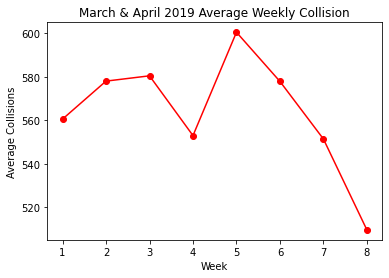

In [31]:
week = range(1,len(before)+1)
plt.title('March & April 2019 Average Weekly Collision')
plt.xlabel('Week')
plt.ylabel('Average Collisions')
plt.plot(week, before, 'r-o')
plt.show()

### Here is the results of the Average Weekly Collisions from March & April 2020

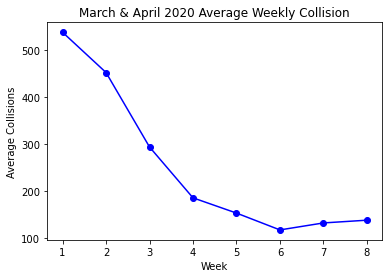

In [32]:
week = range(1,len(after)+1)
plt.title('March & April 2020 Average Weekly Collision')
plt.xlabel('Week')
plt.ylabel('Average Collisions')
plt.plot(week, after, 'b-o')
plt.show()

### Now lets combine both the 2019 & 2020 Data.

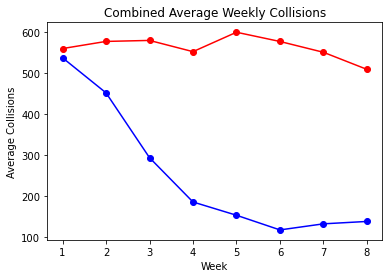

In [33]:
week = range(1,len(after)+1)
plt.title('Combined Average Weekly Collisions')
plt.xlabel('Week')
plt.ylabel('Average Collisions')
plt.plot(week, after, 'b-o')
plt.plot(week,before, 'r-o')
plt.show()

### Based on the the visualitzation. From the two Line graphs we could clearly see that March & April 2019 (Red) was pretty stable from Weeks 1 to 8. Now look from March & April 2020 you can clearly see a big dip in Average Collisions Weekly since New York State started lockdown in March 2020. With this data we can confirm that comparing the 2019 and 2020 COVID-19 did play a role into reducing the number of Collisions. 

### In this project one thing that I added that we did not add on is using Socrata and sodapy. Since it is required to access the API. Another thing we did not learn is importing datetime for the API for Crash date